<a href="https://colab.research.google.com/github/Aravinth13-code/ShadowFox/blob/main/Loan%20approval%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
df = pd.read_csv("/content/loan_prediction.csv")

# Quick view
print(df.head())
print(df.info())
print(df.describe())



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [19]:
# Assuming 'Loan_Status' is target column (1 = approved, 0 = not approved)
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Separate column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipelines for numeric & categorical
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [22]:
# Logistic Regression (baseline)
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131
ROC AUC: 0.7494186046511628


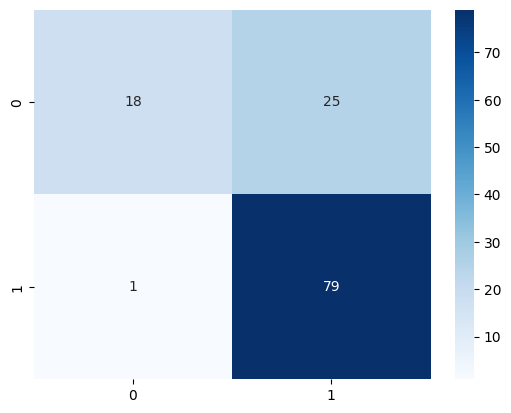

              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [24]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Convert 'Y' to 1 and 'N' to 0 for evaluation metrics
y_test_encoded = y_test.apply(lambda x: 1 if x == 'Y' else 0)
y_pred_encoded = pd.Series(y_pred).apply(lambda x: 1 if x == 'Y' else 0)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test_encoded, y_pred_encoded))
print("Recall:", recall_score(y_test_encoded, y_pred_encoded))
print("F1 Score:", f1_score(y_test_encoded, y_pred_encoded))
print("ROC AUC:", roc_auc_score(y_test_encoded, y_pred_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [25]:
joblib.dump(clf, "loan_approval_model.joblib")
print("Model saved as loan_approval_model.joblib")


Model saved as loan_approval_model.joblib


In [28]:
# Load model
model = joblib.load("loan_approval_model.joblib")

# Example applicant
new_data = pd.DataFrame([{
    "Loan_ID": "LP000001", # Added a placeholder Loan_ID
    "Gender": "Male",
    "Married": "Yes",
    "Dependents": "0",
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 5000,
    "CoapplicantIncome": 2000,
    "LoanAmount": 150,
    "Loan_Amount_Term": 360,
    "Credit_History": 1.0,
    "Property_Area": "Urban"
}])

prediction = model.predict(new_data)
print("Loan Approval Prediction:", "Approved" if prediction[0] == 'Y' else "Not Approved")

Loan Approval Prediction: Approved
